In [1]:
# CSV
# 1 File per Question (4, 5, 6)
# Fields: Darts, Ranks, Nodes, Value of Pi Calculauted, Runtime, Error

# PYTHON
# Input CSV
# Convert to DataFrame
# Calculate Speed Up, Efficiency, Ideal Time
# Plot From DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import subprocess
import pandas as pd
import numpy as np

In [3]:
# header = ['Darts', 'Ranks', 'Nodes', 'Value of Pi Calculauted', 'Runtime', 'Error']
# data = pd.read_csv('exampleData.csv', header=None)
header = ['Darts', 'Ranks', 'Value of Pi Calculauted', 'Runtime', 'Error']
data = pd.read_csv('test1.csv', header=0)
data.columns = header
data.head()

,Darts,Ranks,Value of Pi Calculauted,Runtime,Error
0,100,128,3.15,0.818174,0.008407


In [4]:
darts = data['Darts']
ranks = data['Ranks']
# nodes = data['Nodes']
piCalculated = data['Value of Pi Calculauted']
runTime = data['Runtime']
errorCalculated = data['Error']

dartsUnique = np.sort(darts.unique())
ranksUnique = np.sort(ranks.unique())
# nodesUnique = np.sort(nodes.unique())
piCalculatedUnique = np.sort(piCalculated.unique())
runTimeUnique = np.sort(runTime.unique())
errorCalculatedUnique = np.sort(errorCalculated.unique())

In [5]:
meanRunTimePerProcessor = pd.DataFrame([np.mean(runTime[ranks == numProcessor]) for numProcessor in ranksUnique])
# Time for a Single Processor
serialTime = meanRunTimePerProcessor.iloc[0]
# Speed Up = Time For a Single Processor / Runtime For Multiple Processors
speedUp = serialTime / runTime
# Efficiency = Speedup / Number of processors
efficiency = speedUp / ranks
# Ideal Time = Time For A Single Processor / Number Of Processors
idealTime = serialTime / ranks

# Store Information in DataFrame
data['Speedup'] = speedUp
data['Efficiency'] = efficiency
data['IdealTime'] = idealTime


In [6]:
print(runTime)
print(meanRunTimePerProcessor)
print(speedUp)
print(efficiency)
print(idealTime)

0    0.818174
Name: Runtime, dtype: float64
          0
0  0.818174
0    1.0
dtype: float64
0    0.007812
dtype: float64
0    0.006392
dtype: float64


[0.818174]
[128]


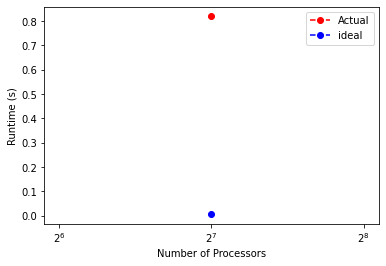

In [7]:
meanRunTimes = np.array(meanRunTimePerProcessor)[0] # Change structure for plotting
print(meanRunTimes)
print(ranksUnique)
plt.figure()
plt.plot(ranksUnique, meanRunTimes, '--r', marker='o', label = 'Actual')
plt.plot(ranksUnique, idealTime, '--b', marker='o', label = 'ideal')
plt.xscale('log', base=2)
plt.xlabel("Number of Processors")
plt.ylabel("Runtime (s)")
plt.legend()
plt.savefig("part4_p3.png")